In [21]:
import xarray as xr
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

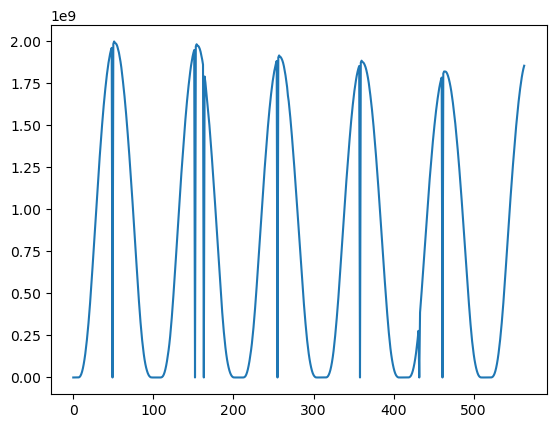

In [31]:
plt.plot(spat_total)

In [35]:
xr.open_dataset(f, engine='netcdf4')

AttributeError: NetCDF: Can't open HDF5 attribute

In [30]:
date = '03-2018'
date_dt = datetime.strptime(date, "%m-%Y")
year = date_dt.strftime("%Y")
month = date_dt.strftime("%m")

##### Himawari Data
if date_dt <= datetime.strptime('2019-03-31', '%Y-%m-%d'):
    version = 'v1.0'
else:
    version = 'v1.1'
directory=Path(f'/g/data/rv74/satellite-products/arc/der/himawari-ahi/solar/p1s/{version}/{year}/{month}')
files = sorted(str(p) for p in directory.rglob("*.nc"))


ds = xr.open_dataset(files[0])
spat_total = [ds.surface_global_irradiance.sum().data]
temp_total = ds.surface_global_irradiance.data

for f in files[1:]:
    ds = xr.open_dataset(f, engine='h5netcdf')

    spat_total.append(ds.surface_global_irradiance.sum().data)
    temp_total += ds.surface_global_irradiance.data

RuntimeError: Error iterating over attributes (addr overflow, addr = 346200, size = 1024, eoa = 346103)

In [70]:
from netCDF4 import Dataset
date = '03-2018'
date_dt = datetime.strptime(date, "%m-%Y")
year = date_dt.strftime("%Y")
month = date_dt.strftime("%m")

##### Himawari Data
if date_dt <= datetime.strptime('2019-03-31', '%Y-%m-%d'):
    version = 'v1.0'
else:
    version = 'v1.1'
directory=Path(f'/g/data/rv74/satellite-products/arc/der/himawari-ahi/solar/p1s/{version}/{year}/{month}')
files = sorted(str(p) for p in directory.rglob("*.nc"))


ds = Dataset(files[0])
# spat_total = [ds.variables['surface_global_irradiance'][:,:,:].sum().data]
temp_total = ds.variables['surface_global_irradiance'][:,:,:]

for f in files[1:]:
    ds = Dataset(f)

    # spat_total.append(ds.variables['surface_global_irradiance'][:,:,:].sum().data)
    temp_total += ds.variables['surface_global_irradiance'][:,:,:]

In [71]:
temp_total

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]]],
  mask=[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]]],
  fill_value=-99999,
  dtype=float64)

In [69]:
np.nanmean(ds.variables['surface_global_irradiance'][:,:,:])

ValueError: output array is read-only

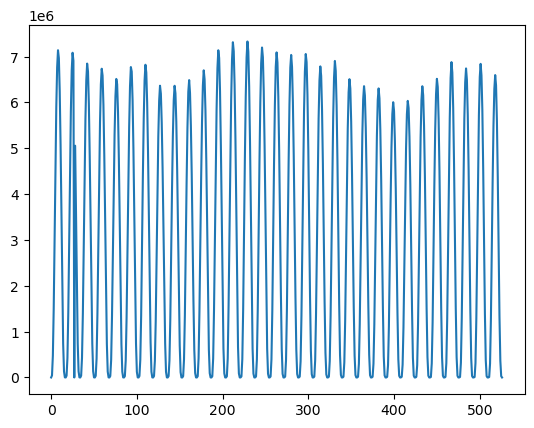

In [41]:
plt.plot(spat_total)